## Esercizio 6

Per prima cosa ho completato il codice del modello ISING monodimensionale implementando l'algoritmo di metropolis e Gibbs nel seguente modo:

- Metropolis: Seleziono casualmente uno spin i-esimo e ne calcolo l'energia 

$$
H_{old} = 
-Js_i (s_{i+1} + s_{i-1}) -hs_i
$$

dove ho fissato $\mu$,$k_B$=1, $J$ è il momento angolare totale e $h$ un campo magnetico esterno. L'hamiltoniana è calcolata con l'assunzione che uno spin interagisce solo con i primi vicini, in 1D quello che lo precede e che lo segue.

Associata l'energia allo spin propongo di flipparne il valore qualunche esse sia tra (+1,-1) e calcolo nuovamente l'energia che chiamo $E_{new}$. Associo a questa proposta la probabilità

$$
p=min[1,e^{-\beta(E_{new}-E_{old})}]
$$

Dove grazie al metropolis la funzione di partizione si elide. Ora genero un numero casuale $r\in (0,1)$ se $r<p$ accetto la mossa altrimento lo spin rimane invariato.

- Gibbs: In questo caso calcolo la probabilità che uno spin i-esimo scelto casualmente sia +1 (avrei potuto scegliere anche -1)  nel seguente modo


$$
    p_{up}= \frac{e^{-\beta H_{up}}}{e^{-\beta H_{up}}+e^{-\beta H_{down}}}
$$

Ora genero un numero casuale $r \in (0,1)$ se $r<p_{up}$ allora lo spin i-esimo sarà +1 altrimenti sarà -1. Quindi con il sampling di Gibbs una mossa la effettuo in ogni caso indipendentemente dall' energia associata allo spin scelto.


Implementati gli algortimi di campionamento aggiungo al codice la possibilità di ricominciare da una configurazione di spin precedente. Questo per portare prima all'equilibrio il sistema e poi effetturae la misura delle gradezze ripartendo dalla configurazione equilibrata.

Oltre all' energia interna, che il codice già misurava, ho implementato le altre grandezze, riporto tutte le quantità e le formule utilizzate:

1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

Ho effettuato le misurazioni per diversi valori di temperatura nell' intervallo $[0.3]$, utilizzando $10^5$ steps MC divisi in $100$ blocchi. 

Il procedimento che ho seguito è stato il seguente:


- Porto all'equilibrio il sistema con diverse simulazioni la prima parte da una configurazione casuale, le successive ricominciano dalle configurazioni precedenti. Per capire se il sistema è all'equilibrio guardo come si comporta l'energia interna e vedo se è saturata ad un certo valore. Ho notato che il sistema andava all'equilibrio abbastanza velocemente indipendentemente dalla temperatura ( chiaramente non temperature troppo basse dove l'accettazione del metropolis è prossima allo zero) dopo circa 2 o tre simulazioni da $10^4$ passi MC. 


- Equilibrato il sistema faccio le misure.


- Ripeto il procedimento per tutti i valori di temperatura scelti.


Riporto i risultati delle misure di $U,C,\chi,M$ per unità si particella in funzione della temperatura per entrambi i metodi di campionamento Metropolis e Gibbs. Confronto i miei risultati con quelli dello specchio python dell' esercitazione.

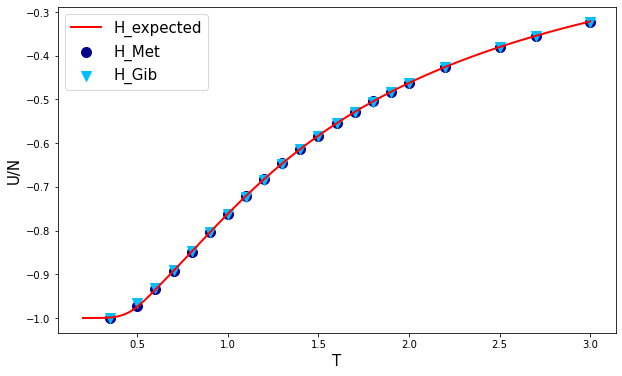

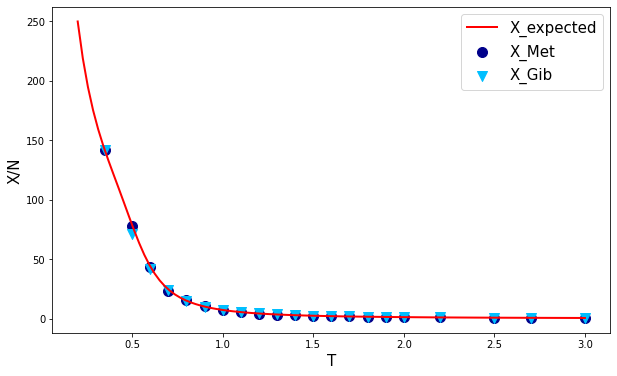

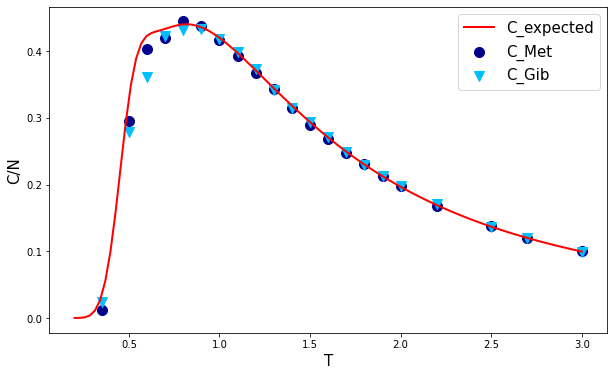

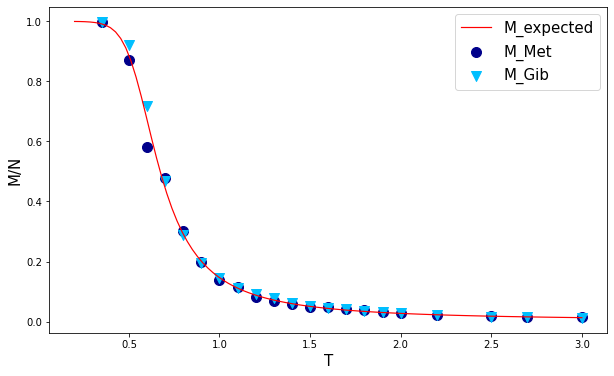

In [29]:
import matplotlib.pyplot as plt
import numpy as np

#input data
points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
h=0.02 #external field

#just some variables for the counts
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th

#energy
e = -J*( th + ch*thN )/( 1 + thN )


#Heat capacity
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

#Magnetization
l1 = np.exp(beta*J)*np.cosh(beta*h)+np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)*np.cosh(beta*h)-2*np.sinh(2*beta*J))
l2 = np.exp(beta*J)*np.cosh(beta*h)-np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)*np.cosh(beta*h)-2*np.sinh(2*beta*J))
Z = l1**Ns + l2**Ns
M = (np.exp(beta*J)*np.sinh(beta*h)*((l1**(Ns-1))*(1+np.exp(beta*J)*np.cosh(beta*h)/np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)*np.cosh(beta*h)-2*np.sinh(2*beta*J))) 
        + (l2**(Ns-1))*(1-np.exp(beta*J)*np.cosh(beta*h)/np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)*np.cosh(beta*h)-2*np.sinh(2*beta*J)))))/(Z)

#Susceptibility
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)


with open("SuscettivitàMagnetica_Metropolis.dat") as FileFin_Chi_Met:
	X_Met=np.loadtxt(FileFin_Chi_Met,usecols=(0,1,2),dtype=float)

with open("EnergiaInterna_Metropolis.dat") as FileFin_Ene_Met:
	E_Met=np.loadtxt(FileFin_Ene_Met,usecols=(0,1,2),dtype=float)

with open("CapacitàTermica_Metropolis.dat") as FileFin_Heat_Met:
	C_Met=np.loadtxt(FileFin_Heat_Met,usecols=(0,1,2),dtype=float)

with open("Magnetizzazione_Metropolis.dat") as FileFin_Mag_Met:
	M_Met=np.loadtxt(FileFin_Mag_Met,usecols=(0,1,2),dtype=float)



with open("SuscettivitàMagnetica_Gibbs.dat") as FileFin_Chi_Gib:
	X_Gib=np.loadtxt(FileFin_Chi_Gib,usecols=(0,1,2),dtype=float)

with open("EnergiaInterna_Gibbs.dat") as FileFin_Ene_Gib:
	E_Gib=np.loadtxt(FileFin_Ene_Gib,usecols=(0,1,2),dtype=float)

with open("CapacitàTermica_Gibbs.dat") as FileFin_Heat_Gib:
	C_Gib=np.loadtxt(FileFin_Heat_Gib,usecols=(0,1,2),dtype=float)

with open("Magnetizzazione_Gibbs.dat") as FileFin_Mag_Gib:
	M_Gib=np.loadtxt(FileFin_Mag_Gib,usecols=(0,1,2),dtype=float)
    

plt.figure(figsize=(10,6))
plt.plot(T,e,label='H_expected',ls='solid',linewidth=2.,color='red')
plt.scatter(E_Met[:,0],E_Met[:,1],label='H_Met',marker='o',s=100,c='darkblue')
plt.scatter(E_Gib[:,0],E_Gib[:,1],label='H_Gib',marker='v',s=100,c='deepskyblue')
plt.xlabel("T",fontsize=15)
plt.ylabel("U/N",fontsize=15)
plt.legend(fontsize="15")
plt.show()

plt.figure(figsize=(10,6))
plt.plot(T,X,label='X_expected',ls='solid',linewidth=2.,color='red')
plt.scatter(X_Met[:,0],X_Met[:,1],label='X_Met',marker='o',s=100,c='darkblue')
plt.scatter(X_Gib[:,0],X_Gib[:,1],label='X_Gib',marker='v',s=100,c='deepskyblue')
plt.xlabel("T",fontsize=15)
plt.ylabel("X/N",fontsize=15)
plt.legend(fontsize="15")
plt.show()

plt.figure(figsize=(10,6))
plt.plot(T,heat,label='C_expected',ls='solid',linewidth=2.,color='red')
plt.scatter(C_Met[:,0],C_Met[:,1],label='C_Met',marker='o',s=100,c='darkblue')
plt.scatter(C_Gib[:,0],C_Gib[:,1],label='C_Gib',marker='v',s=100,c='deepskyblue')
plt.xlabel("T",fontsize=15)
plt.ylabel("C/N",fontsize=15)
plt.legend(fontsize="15")
plt.show()

plt.figure(figsize=(10,6))
plt.plot(T,M,label='M_expected',ls='solid',linewidth=1.2,color='red')
plt.scatter(M_Met[:,0],M_Met[:,1],label='M_Met',marker='o',s=100,c='darkblue')
plt.scatter(M_Gib[:,0],M_Gib[:,1],label='M_Gib',marker='v',s=100,c='deepskyblue')
plt.xlabel("T",fontsize=15)
plt.ylabel("M/N",fontsize=15)
plt.legend(fontsize="15")
plt.show()